In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Модель линейной регрессии
from sklearn.linear_model import LinearRegression

%matplotlib inline

## Обучение. Предсказание рейтингов Fandango

С помощью линейной регрессии попробую предсказать рейтинги Fandango, для 10 худших фильмов

In [2]:
# Загрузить данные в DataFrame из csv-файла
df = pd.read_csv('my_norm_scores_df.csv', index_col='Unnamed: 0')
df.sample(2)

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
56,3.0,2.7,3.0,2.0,3.0,2.9,3.0
74,4.0,4.0,4.4,3.9,3.4,4.0,3.7


In [3]:
df.shape

(145, 7)

**10 фильмов с наихудшими рейтингами по версии Rotten Tomatoes Critic - оставлю для тестирования.**

In [4]:
# 10 фильмов с наименьшими рейтингами по колонке 'RT_Norm'
testDf = df.nsmallest(10, 'RT_Norm')
testDf.shape

(10, 7)

In [5]:
trainDf = df.drop(testDf.index, axis='rows')
trainDf.shape

(135, 7)

In [6]:
# Проверка
trainDf.index.intersection(testDf.index)

Index([], dtype='int64')

In [7]:
# Признаки - Features
X_train = trainDf.drop('STARS', axis='columns')
# Целевая переменная
y_train = trainDf['STARS']

# Признаки - Features
X_test = testDf.drop('STARS', axis='columns')
# Целевая переменная
y_test = testDf['STARS']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((135, 6), (135,), (10, 6), (10,))

**Так как данные (в предыдущем блокноте) уже были нормализованы от 0 до 5. Здесь нормализация не требуется**

In [8]:
# Создать объект модели обучения
linearRegressionModel = LinearRegression()

# Обучить модель
linearRegressionModel.fit(X_train, y_train)

# Вычислить целевые переменные, на основе обученной модели
yPredict = linearRegressionModel.predict(X_test)
#yPredict

In [9]:
# Остатки (ошибки работы модели)
testResiduals = y_test - yPredict
testResiduals

49   -0.219351
25    0.184787
28    0.132571
54    0.120766
84   -0.101907
50    0.211978
77    0.106863
78    0.098377
83    0.008346
87    0.110835
Name: STARS, dtype: float64

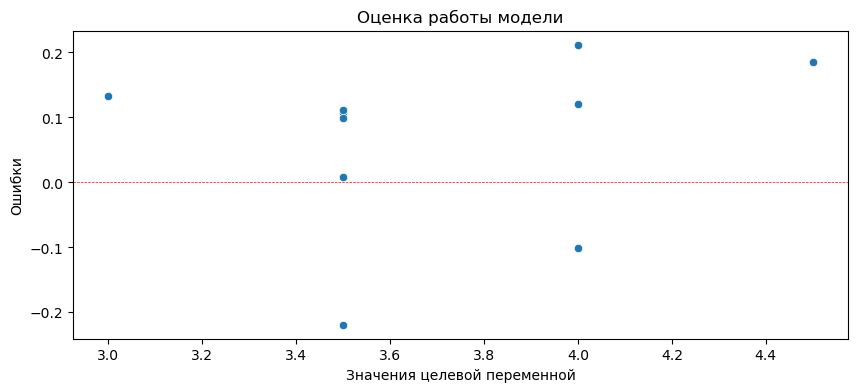

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=100)
# Строим график рассеяния ошибок относительно 0
# Основной график для оценивания остатков
sns.scatterplot(x=y_test, y=testResiduals)
#
axes.set_title('Оценка работы модели')
axes.set_xlabel('Значения целевой переменной')
axes.set_ylabel('Ошибки')
# Нарисовать нулевую линию по оси Y
axes.axhline(y=0, color='#FF0000', linestyle='--', linewidth=0.5);

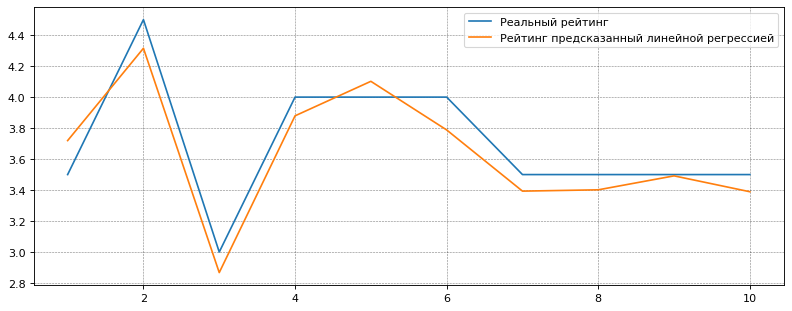

In [11]:
x = np.arange(1, y_test.shape[0]+1)

fig = plt.figure(figsize=(10, 4), dpi=80)
ax = plt.axes()

ax.plot(x, y_test.values, label='Реальный рейтинг');
ax.plot(x, yPredict, label='Рейтинг предсказанный линейной регрессией');

ax.legend(loc='best')
ax.grid(axis='both', color='black', linestyle='dashed', linewidth=0.5, alpha=0.5);
plt.tight_layout();

## Вывод:

На двух графиках (выше) хорошо видно, даже обучаясь на умышленно завышенных рейтингах, модель все равно в 8-ми случаях из 10  предсказала рейтинг ниже, чем был у Fandango.**